# Exploratory Data Analysis (EDA) – Supply Chain Intelligence
## Objective

This notebook focuses exclusively on Exploratory Data Analysis (EDA) for the Supply Chain Intelligence project. The goal is to understand transactional patterns, operational workload, temporal behavior, and inflation-adjusted economic signals before any modeling or clustering is applied.

This separation ensures:

- Clear analytical storytelling

- Reproducibility

- Proper ML lifecycle discipline (EDA → Feature Engineering → Modeling)

# 1. Environment Setup

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 2. Project Paths & Data Loading

In [2]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_PATH = os.path.join(
PROJECT_ROOT, "data", "processed", "cleaned_retail_data.csv"
)


df = pd.read_csv(DATA_PATH, parse_dates=["InvoiceDate"])

In [5]:
display(df.head())
df.info()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Period
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Year 2009-2010
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Year 2009-2010
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Year 2009-2010
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Year 2009-2010
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Year 2009-2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014932 entries, 0 to 1014931
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1014932 non-null  int64         
 1   StockCode    1014932 non-null  object        
 2   Description  1014932 non-null  object        
 3   Quantity     1014932 non-null  int64         
 4   InvoiceDate  1014932 non-null  datetime64[ns]
 5   Price        1014932 non-null  float64       
 6   Customer ID  786083 non-null   float64       
 7   Country      1014932 non-null  object        
 8   Period       1014932 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 69.7+ MB


# 3. Feature Validation & Revenue Construction

In [7]:
if "TotalSum" not in df.columns:
    df["TotalSum"] = df["Quantity"] * df["Price"]


df["Year"] = df["InvoiceDate"].dt.year

### Rationale:

- Ensures monetary consistency

- Allows temporal segmentation (2010 vs 2011)

# 4. Inflation Adjustment (Constant Prices)

To enable intertemporal comparability, 2011 prices are deflated to 2010 GBP. 

In [8]:
INFLATION_2011 = 0.039 # UK CPI 2011 ≈ 3.9%


mask_2011 = df["Year"] == 2011


df.loc[mask_2011, ["TotalSum", "Price"]] /= (1 + INFLATION_2011)

# 5. Temporal Decomposition

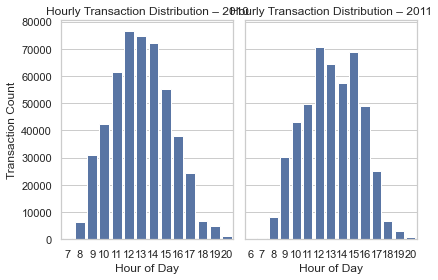

In [ ]:
df["DayName"] = df["InvoiceDate"].dt.day_name()
df["Hour"] = df["InvoiceDate"].dt.hour

# Transaction Volume by Day of Week
DAYS_ORDER = [
"Monday", "Tuesday", "Wednesday",
"Thursday", "Friday", "Saturday", "Sunday"
]

day_share = (
df.groupby(["Year", "DayName"])
.size()
.groupby(level=0)
.apply(lambda x: 100 * x / x.sum())
.unstack()
.reindex(columns=DAYS_ORDER)
)

day_share

# Hourly Operational Peaks

fig, axes = plt.subplots(1, 2, sharey=True)

for ax, year in zip(axes, [2010, 2011]):
    sns.countplot(
    data=df[df["Year"] == year],
    x="Hour",
    ax=ax
    )
    ax.set_title(f"Hourly Transaction Distribution – {year}")
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Transaction Count")

plt.tight_layout()
plt.show()

### Insight:

- Reveals demand peaks

- Informs shift planning and system load

# Revenue Distribution Analysis

In [13]:
revenue_by_sku = (
df.groupby("Description", as_index=False)["TotalSum"]
.sum()
.sort_values("TotalSum", ascending=False)
)


revenue_by_sku.head(10)

,Description,TotalSum
3753,REGENCY CAKESTAND 3 TIER,250956.104100
5065,WHITE HANGING HEART T-LIGHT HOLDER,187323.986208
3146,PARTY BUNTING,130086.218980
2389,JUMBO BAG RED RETROSPOT,102480.113609
3114,PAPER CHAIN KIT 50'S CHRISTMAS,81170.082368
295,ASSORTED COLOUR BIRD ORNAMENT,76024.723436
3531,POSTAGE,73415.727353
997,CHILLI LIGHTS,67685.683282
1004,CHOCOLATE HOT WATER BOTTLE,59192.483859
2271,HOT WATER BOTTLE TEA AND SYMPATHY,58243.865313


# Key EDA Takeaways

- Transaction volume is temporally concentrated (weekday & hourly peaks)

- Nominal growth disappears after inflation adjustment

- Revenue follows a Pareto-like distribution

- Data is suitable for:

    - RFM segmentation

    - ABC inventory classification

    - Customer lifetime analysis

# Next Step

➡ Proceed to RFM Feature Engineering & Clustering in a dedicated notebook (02_rfm_clustering.ipynb).

,DayName,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,Year,,,,,,,
2009,2009,16.94%,20.66%,21.42%,16.51%,13.62%,0.91%,9.94%
2010,2010,18.02%,17.40%,16.87%,18.96%,13.90%,nan%,14.85%
2011,2011,17.47%,19.03%,17.40%,19.07%,14.81%,nan%,12.22%


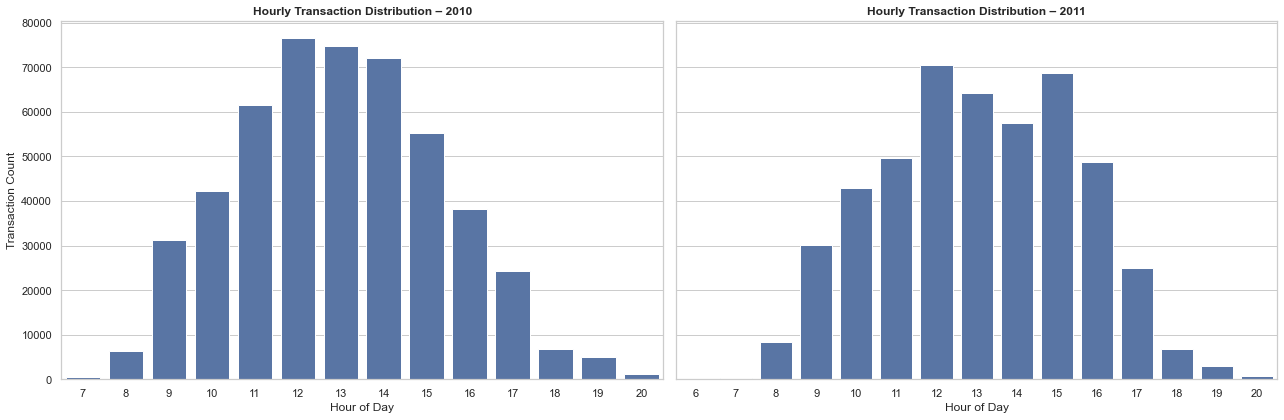

,Description,Revenue (£)
3753,REGENCY CAKESTAND 3 TIER,"£250,956.10"
5065,WHITE HANGING HEART T-LIGHT HOLDER,"£187,323.99"
3146,PARTY BUNTING,"£130,086.22"
2389,JUMBO BAG RED RETROSPOT,"£102,480.11"
3114,PAPER CHAIN KIT 50'S CHRISTMAS,"£81,170.08"
295,ASSORTED COLOUR BIRD ORNAMENT,"£76,024.72"
3531,POSTAGE,"£73,415.73"
997,CHILLI LIGHTS,"£67,685.68"
1004,CHOCOLATE HOT WATER BOTTLE,"£59,192.48"
2271,HOT WATER BOTTLE TEA AND SYMPATHY,"£58,243.87"


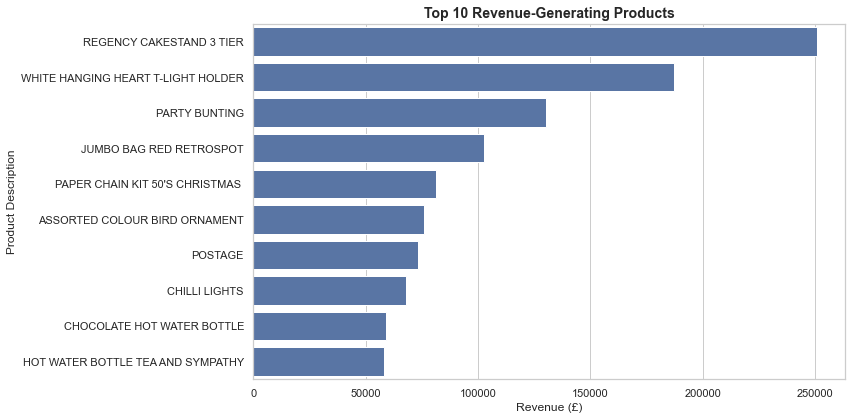

'\nInsights:\n- Transaction volume exhibits strong weekday and hourly concentration.\n- After inflation adjustment, nominal growth between 2010 and 2011 weakens.\n- Revenue distribution is highly skewed, suggesting Pareto dynamics.\n- Data is suitable for downstream:\n    - RFM customer segmentation\n    - ABC inventory classification\n    - Revenue concentration analysis\n'

In [15]:
# ===============================================================
# Exploratory Data Analysis (EDA) – Supply Chain Intelligence
# ===============================================================
# Objective:
# Analyze temporal and operational transaction patterns and ensure
# intertemporal comparability via inflation-adjusted revenues.
# This notebook is strictly EDA. No modeling or segmentation.
# ===============================================================

# ======================
# 1. Environment Setup
# ======================

import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ======================
# 2. Project Paths & Data Loading
# ======================

CURRENT_DIR = os.getcwd()
PROJECT_ROOT = os.path.abspath(os.path.join(CURRENT_DIR, ".."))

if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

DATA_PATH = os.path.join(
    PROJECT_ROOT, "data", "processed", "cleaned_retail_data.csv"
)

df = pd.read_csv(DATA_PATH, parse_dates=["InvoiceDate"])

# ======================
# 3. Feature Validation & Revenue Construction
# ======================

if "TotalSum" not in df.columns:
    df["TotalSum"] = df["Quantity"] * df["Price"]

df["Year"] = df["InvoiceDate"].dt.year

# ======================
# 4. Inflation Adjustment (2011 → 2010 Constant GBP)
# ======================

INFLATION_2011 = 0.039  # UK CPI ~3.9%

mask_2011 = df["Year"] == 2011
df.loc[mask_2011, ["TotalSum", "Price"]] /= (1 + INFLATION_2011)

# ======================
# 5. Temporal Feature Engineering
# ======================

df["DayName"] = df["InvoiceDate"].dt.day_name()
df["Hour"] = df["InvoiceDate"].dt.hour

# ======================
# 6. Logistics Workload Analysis
# ======================

DAYS_ORDER = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

# ---- 6.1 Transaction Share by Day (2010 vs 2011)

day_share = (
    df.groupby(["Year", "DayName"])
      .size()
      .groupby(level=0)
      .apply(lambda x: 100 * x / x.sum())
      .unstack()
      .reindex(columns=DAYS_ORDER)
)

display(day_share.style.format("{:.2f}%"))

# ---- 6.2 Hourly Operational Peaks

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(18, 6))

for ax, year in zip(axes, [2010, 2011]):
    sns.countplot(
        data=df[df["Year"] == year],
        x="Hour",
        ax=ax
    )
    ax.set_title(f"Hourly Transaction Distribution – {year}", fontweight="bold")
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Transaction Count")

plt.tight_layout()
plt.show()

# =========================================================
# 7. Revenue by SKU (Top Products)
# =========================================================

# Aggregate revenue by SKU
revenue_by_sku = (
    df.groupby("Description", as_index=False)["TotalSum"]
      .sum()
      .rename(columns={"TotalSum": "Revenue (£)"})
      .sort_values("Revenue (£)", ascending=False)
)

# Display top 10 with currency formatting
display(
    revenue_by_sku.head(10).style.format({
        "Revenue (£)": "£{:,.2f}"
    })
)

# =========================================================
# Bar Plot – Top 10 Revenue-Generating SKUs
# =========================================================

top_10_skus = revenue_by_sku.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_skus,
    x="Revenue (£)",
    y="Description"
)

plt.title(
    "Top 10 Revenue-Generating Products",
    fontsize=14,
    fontweight="bold"
)
plt.xlabel("Revenue (£)")
plt.ylabel("Product Description")

plt.tight_layout()
plt.show()


# ======================
# 8. Key EDA Takeaways
# ======================

"""
Insights:
- Transaction volume exhibits strong weekday and hourly concentration.
- After inflation adjustment, nominal growth between 2010 and 2011 weakens.
- Revenue distribution is highly skewed, suggesting Pareto dynamics.
- Data is suitable for downstream:
    - RFM customer segmentation
    - ABC inventory classification
    - Revenue concentration analysis
"""
